In [2]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:

data = pd.read_csv(r'C:\Users\Admin\Desktop\BTC-USD.csv')
print(data.tail())

            Date         Open         High          Low        Close  \
3061  20-05-2023  26888.84180  27155.15820  26843.27734  27129.58594   
3062  21-05-2023  27118.42383  27265.91797  26706.92188  26753.82617   
3063  22-05-2023  26749.89258  27045.73438  26549.73438  26851.27734   
3064  23-05-2023  26855.96094  27434.68359  26816.17969  27225.72656   
3065  24-05-2023  27219.15039  27220.08789  26696.73242  26696.73242   

        Adj Close        Volume  
3061  27129.58594  7.044911e+09  
3062  26753.82617  8.647417e+09  
3063  26851.27734  1.105677e+10  
3064  27225.72656  1.369720e+10  
3065  26696.73242  1.229097e+10  


In [4]:
data_training = data[data['Date']< '2023-05-25'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2015,320.434998,320.434998,314.002991,314.248993,314.248993,8.036550e+06
1,02-01-2015,314.079010,315.838989,313.565002,315.032013,315.032013,7.860650e+06
2,03-01-2015,314.846008,315.149994,281.082001,281.082001,281.082001,3.305440e+07
3,04-01-2015,281.145996,287.230011,257.612000,264.195007,264.195007,5.562910e+07
4,05-01-2015,265.084015,278.341003,265.084015,274.473999,274.473999,4.396280e+07
...,...,...,...,...,...,...,...
3057,16-05-2023,27171.513670,27299.304690,26878.947270,27036.650390,27036.650390,1.273224e+10
3058,17-05-2023,27035.470700,27465.927730,26600.144530,27398.802730,27398.802730,1.514001e+10
3059,18-05-2023,27401.650390,27466.527340,26415.101560,26832.208980,26832.208980,1.522294e+10
3060,19-05-2023,26826.753910,27128.619140,26700.210940,26890.128910,26890.128910,1.125898e+10


In [5]:
data_test = data[data['Date']< '2023-05-25'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2015,320.434998,320.434998,314.002991,314.248993,314.248993,8.036550e+06
1,02-01-2015,314.079010,315.838989,313.565002,315.032013,315.032013,7.860650e+06
2,03-01-2015,314.846008,315.149994,281.082001,281.082001,281.082001,3.305440e+07
3,04-01-2015,281.145996,287.230011,257.612000,264.195007,264.195007,5.562910e+07
4,05-01-2015,265.084015,278.341003,265.084015,274.473999,274.473999,4.396280e+07
...,...,...,...,...,...,...,...
3057,16-05-2023,27171.513670,27299.304690,26878.947270,27036.650390,27036.650390,1.273224e+10
3058,17-05-2023,27035.470700,27465.927730,26600.144530,27398.802730,27398.802730,1.514001e+10
3059,18-05-2023,27401.650390,27466.527340,26415.101560,26832.208980,26832.208980,1.522294e+10
3060,19-05-2023,26826.753910,27128.619140,26700.210940,26890.128910,26890.128910,1.125898e+10


In [6]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,320.434998,320.434998,314.002991,314.248993,8036550.0
1,314.079010,315.838989,313.565002,315.032013,7860650.0
2,314.846008,315.149994,281.082001,281.082001,33054400.0
3,281.145996,287.230011,257.612000,264.195007,55629100.0
4,265.084015,278.341003,265.084015,274.473999,43962800.0


In [7]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[2.13050245e-03, 1.58511714e-03, 2.15211912e-03, 2.02030823e-03,
        1.39611884e-06],
       [2.03616194e-03, 1.51809832e-03, 2.14550403e-03, 2.03192768e-03,
        0.00000000e+00],
       [2.04754632e-03, 1.50805143e-03, 1.65490246e-03, 1.52813403e-03,
        1.99962872e-04],
       ...,
       [4.04090943e-01, 3.97428307e-01, 3.96365694e-01, 3.95527678e-01,
        1.20762121e-01],
       [3.95557883e-01, 3.92500944e-01, 4.00671795e-01, 3.96387168e-01,
        8.93001953e-02],
       [3.96479439e-01, 3.92887936e-01, 4.02832575e-01, 3.99940537e-01,
        5.58530933e-02]])

In [8]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
 X_train.append(training_data[i-60:i])
 Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(1960, 60, 5)

Building RNN using LSTM

In [9]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))


In [10]:
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))


In [11]:
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))


In [12]:
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 40, batch_size =100, validation_split=0.1)


Epoch 1/40
18/18 [==============================] - 7s 227ms/step - loss: 0.0467 - val_loss: 0.0096
Epoch 2/40
18/18 [==============================] - 4s 201ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 3/40
18/18 [==============================] - 4s 204ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 4/40
18/18 [==============================] - 4s 206ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 5/40
18/18 [==============================] - 4s 204ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 6/40
18/18 [==============================] - 4s 210ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 7/40
18/18 [==============================] - 4s 204ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 8/40
18/18 [==============================] - 4s 203ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 9/40
18/18 [==============================] - 4s 204ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 10/40
18/18 [==============================] - 4s 205ms/step - loss: 0.0041 - val_loss: 0.0013

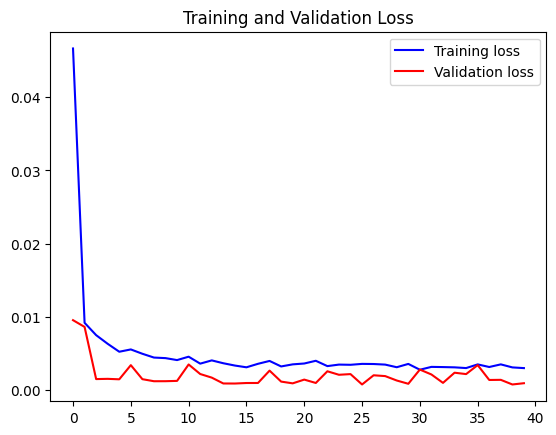

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [15]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18220\4162481076.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,23150.92969,23880.63281,23088.62695,23646.55078,2.466284e+10
1,23647.01953,23739.13867,23245.02148,23475.46680,2.038640e+10
2,23476.63281,23479.34766,22213.23828,22362.67969,2.606240e+10
3,22362.92383,22405.17773,22198.98047,22353.34961,1.116601e+10
4,22354.14453,22613.68555,22307.14258,22435.51367,1.331700e+10


In [16]:
inputs = scaler.transform(df) 
inputs

array([[0.34099844, 0.34513894, 0.34612484, 0.34825481, 0.19568666],
       [0.34836179, 0.34307568, 0.34848692, 0.34571605, 0.16174452],
       [0.34583278, 0.33928742, 0.33290355, 0.32920309, 0.206795  ],
       ...,
       [0.40409094, 0.39742831, 0.39636569, 0.39552768, 0.12076212],
       [0.39555788, 0.39250094, 0.4006718 , 0.39638717, 0.0893002 ],
       [0.39647944, 0.39288794, 0.40283257, 0.39994054, 0.05585309]])

In [17]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
Y_pred, Y_test


64/64 [==============================] - 2s 21ms/step


(array([[0.3628203 ],
        [0.3585226 ],
        [0.34905967],
        ...,
        [0.36722314],
        [0.36530834],
        [0.36383307]], dtype=float32),
 array([0.0021305 , 0.00203616, 0.00204755, ..., 0.40409094, 0.39555788,
        0.39647944]))

In [18]:
scaler.scale_

array([1.48427770e-05, 1.45819584e-05, 1.51033327e-05, 1.48392776e-05,
       7.93700310e-12])

In [19]:
X_test


array([[[3.40998444e-01, 3.45138942e-01, 3.46124841e-01, 3.48254812e-01,
         1.95686657e-01],
        [3.48361794e-01, 3.43075681e-01, 3.48486920e-01, 3.45716049e-01,
         1.61744518e-01],
        [3.45832782e-01, 3.39287419e-01, 3.32903555e-01, 3.29203092e-01,
         2.06794996e-01],
        ...,
        [4.04090943e-01, 3.97428307e-01, 3.96365694e-01, 3.95527678e-01,
         1.20762121e-01],
        [3.95557883e-01, 3.92500944e-01, 4.00671795e-01, 3.96387168e-01,
         8.93001953e-02],
        [3.96479439e-01, 3.92887936e-01, 4.02832575e-01, 3.99940537e-01,
         5.58530933e-02]],

       [[3.48361794e-01, 3.43075681e-01, 3.48486920e-01, 3.45716049e-01,
         1.61744518e-01],
        [3.45832782e-01, 3.39287419e-01, 3.32903555e-01, 3.29203092e-01,
         2.06794996e-01],
        [3.29302248e-01, 3.23623918e-01, 3.32688214e-01, 3.29064641e-01,
         8.85622890e-02],
        ...,
        [3.95557883e-01, 3.92500944e-01, 4.00671795e-01, 3.96387168e-01,
        

In [20]:
Y_test

array([0.0021305 , 0.00203616, 0.00204755, ..., 0.40409094, 0.39555788,
       0.39647944])

In [21]:
Y_pred = model.predict(X_test)
mse = np.mean((Y_pred - Y_test)**2)
print("MSE: %.4f" % mse)
rmse = np.sqrt(mse)
print("RMSE: %.4f" % rmse)

64/64 [==============================] - 1s 18ms/step
MSE: 0.1026
RMSE: 0.3204


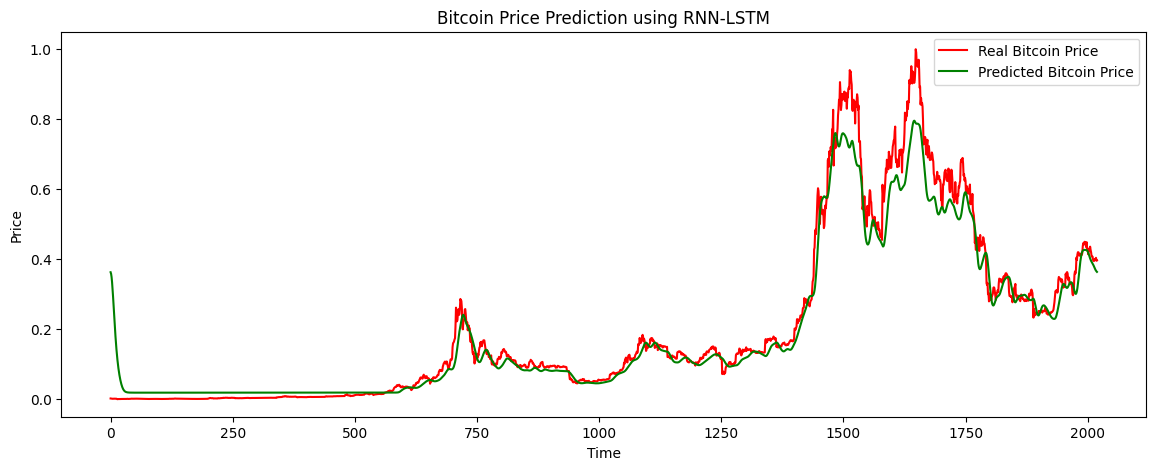

In [22]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
Y_pred1 = scaler.inverse_transform(Y_pred.reshape(-1, 5))
Y_test1 = scaler.inverse_transform(Y_test.reshape(-1, 5))

In [31]:
rmse_1 = sqrt(mean_squared_error( Y_pred1, Y_test1))
print('Test RMSE: %.3f' % ((rmse_1)/100))

Test RMSE: 28506953.030
